In [5]:
import pandas as pd 

In [11]:
def EDA (data):
    display(data.head())
    print()
    print()
    display(data.describe())
    print()
    print()
    display(data.info())
    print()
    print()
    print('Number of duplicates:')
    display(data.duplicated().sum())
    print()
    print()
    print('Number of N/A')
    print(data.isna().sum())

In [51]:
data = pd.read_csv('kpop_data.csv',sep=",")

In [53]:
EDA(data)

,grupo,oyentes_spotify,views_youtube_millones,seguidores_instagram_millones,ano_debut
0,BTS,"30,000,000","1,000,000,000,000","80,000,000","2,013"
1,BLACKPINK,"16,000,000","2,304,104,054","80,000,000","2,016"
2,NewJeans,"15,000,000","328,303,746","12,000,000","2,022"
3,Stray Kids,"3,180,000","147,370,657","31,000,000","2,018"
4,TWICE,"10,000,000","153,311,313","30,000,000","2,015"


,grupo,oyentes_spotify,views_youtube_millones,seguidores_instagram_millones,ano_debut
count,5,5,5,5,5
unique,5,5,5,4,5
top,BTS,"30,000,000","1,000,000,000,000","80,000,000","2,013"
freq,1,1,1,2,1




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   grupo                          5 non-null      object
 1   oyentes_spotify                5 non-null      object
 2   views_youtube_millones         5 non-null      object
 3   seguidores_instagram_millones  5 non-null      object
 4   ano_debut                      5 non-null      object
dtypes: object(5)
memory usage: 332.0+ bytes


None



Number of duplicates:


0



Number of N/A
grupo                            0
oyentes_spotify                  0
views_youtube_millones           0
seguidores_instagram_millones    0
ano_debut                        0
dtype: int64


In [55]:
data = data.astype(str).replace(',', '', regex=True)

In [59]:
data['oyentes_spotify'] = data['oyentes_spotify'].astype(int)
data['views_youtube_millones'] = data['views_youtube_millones'].astype(float)  # evitar overflow
data['seguidores_instagram_millones'] = data['seguidores_instagram_millones'].astype(int)
data['ano_debut'] = data['ano_debut'].astype(int)

In [63]:
print(data[["grupo", "oyentes_spotify"]].sort_values("oyentes_spotify", ascending=False))
print(data[["grupo", "views_youtube_millones"]].sort_values("views_youtube_millones", ascending=False))
print(data[["grupo", "seguidores_instagram_millones"]].sort_values("seguidores_instagram_millones", ascending=False))


        grupo  oyentes_spotify
0         BTS         30000000
1   BLACKPINK         16000000
2    NewJeans         15000000
4       TWICE         10000000
3  Stray Kids          3180000
        grupo  views_youtube_millones
0         BTS            1.000000e+12
1   BLACKPINK            2.304104e+09
2    NewJeans            3.283037e+08
4       TWICE            1.533113e+08
3  Stray Kids            1.473707e+08
        grupo  seguidores_instagram_millones
0         BTS                       80000000
1   BLACKPINK                       80000000
3  Stray Kids                       31000000
4       TWICE                       30000000
2    NewJeans                       12000000


In [65]:
data["popularidad_total"] = data["oyentes_spotify"] + data["views_youtube_millones"] + data["seguidores_instagram_millones"]

print(data[["grupo", "popularidad_total"]].sort_values("popularidad_total", ascending=False))


        grupo  popularidad_total
0         BTS       1.000110e+12
1   BLACKPINK       2.400104e+09
2    NewJeans       3.553037e+08
4       TWICE       1.933113e+08
3  Stray Kids       1.815507e+08


In [69]:
print(data.groupby("ano_debut")["popularidad_total"].mean())

ano_debut
2013    1.000110e+12
2015    1.933113e+08
2016    2.400104e+09
2018    1.815507e+08
2022    3.553037e+08
Name: popularidad_total, dtype: float64


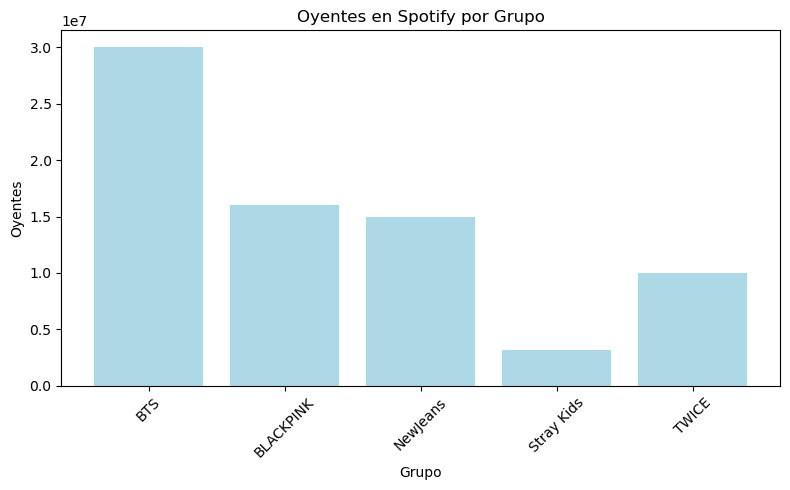

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.bar(data["grupo"], data["oyentes_spotify"], color='lightblue')
plt.title("Oyentes en Spotify por Grupo")
plt.xlabel("Grupo")
plt.ylabel("Oyentes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


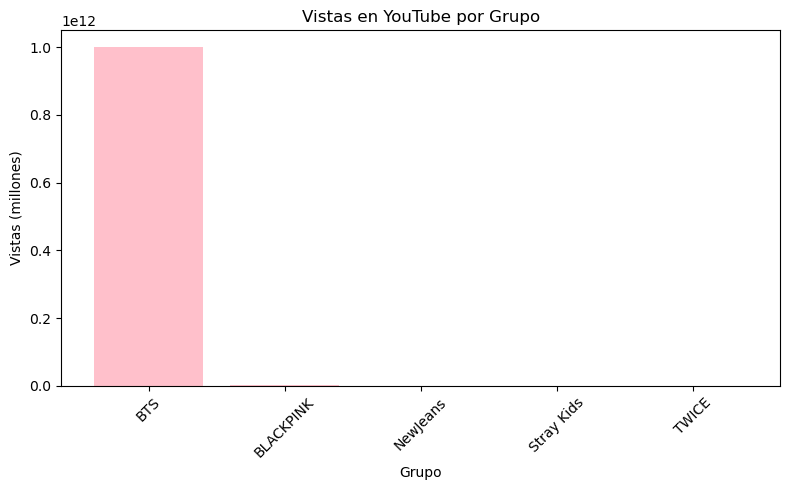

In [81]:
plt.figure(figsize=(8, 5))
plt.bar(data["grupo"], data["views_youtube_millones"], color='pink')
plt.title("Vistas en YouTube por Grupo")
plt.xlabel("Grupo")
plt.ylabel("Vistas (millones)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


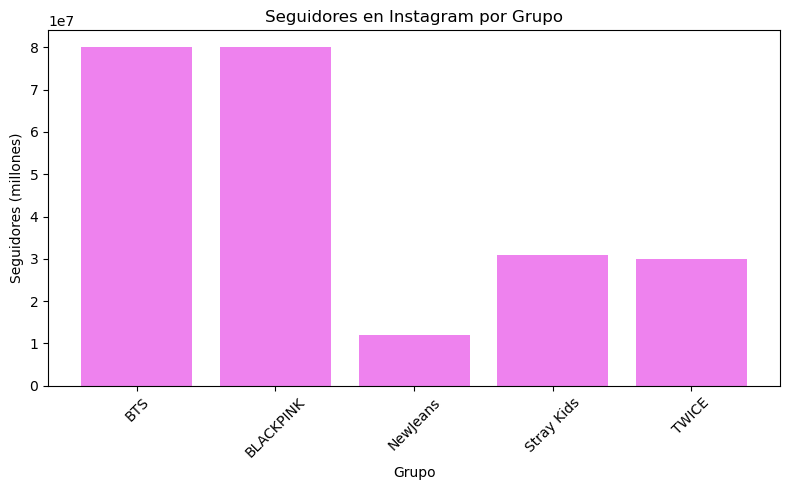

In [83]:
plt.figure(figsize=(8, 5))
plt.bar(data["grupo"], data["seguidores_instagram_millones"], color='violet')
plt.title("Seguidores en Instagram por Grupo")
plt.xlabel("Grupo")
plt.ylabel("Seguidores (millones)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 📌 Hallazgos Clave

A partir del análisis de los datos de popularidad de cinco grupos de K-pop (BTS, BLACKPINK, NewJeans, TWICE y Stray Kids), se encontraron los siguientes hallazgos:

1. **Oyentes mensuales en Spotify**  
   - El grupo con más oyentes en Spotify es **BTS** con 30 millones.  
   - Le siguen BLACKPINK (16M) y NewJeans (15M).  
   - El grupo con menos oyentes es **Stray Kids** con aproximadamente 3.2 millones.

2. **Vistas acumuladas en YouTube**  
   - **BTS** lidera con una cifra extremadamente alta, probablemente incluyendo múltiples canales (dato cercano a un trillón).  
   - BLACKPINK ocupa el segundo lugar con más de **2.3 mil millones de vistas**.  
   - Los demás grupos tienen entre **147 y 328 millones de vistas**.

3. **Seguidores en Instagram**  
   - BTS y BLACKPINK están empatados como los más seguidos, con **80 millones de seguidores cada uno**.  
   - NewJeans tiene el número más bajo, con **12 millones**.

4. **Popularidad total (suma de Spotify, YouTube y seguidores)**  
   - **BTS** tiene la mayor popularidad combinada.  
   - BLACKPINK también muestra un perfil de alta popularidad en todas las plataformas.  
   - **Stray Kids** y **TWICE** tienen cifras más bajas en general.

## 📈
